## Imports

In [1]:
from ipynb.fs.full.Jacobian import *

import numpy as np
from numpy import linalg as LA
import sympy as sp

import matplotlib.pyplot as plt
import math

## Global Variables

In [129]:
#Time variables
interval = 10
delta = 0.1

#Numbers represent how far we want to be precised.
Epsilon = 10**-2
Nnewton = 10

## Transitionals functions

In [3]:
"""
    Create the function f wich correspond to this equality : du/dt = expr(u, v). 
    Here du/dt -> un - un-1 / delta
    
    @return: the new function ready to be evaluated.
    
    @var: the symbol we want to evalute (u or v)
    @term_1: the previous term
    @expr: the function tied.
"""

def create_f(var, term_1, expr):
    return (var - term_1)/delta - expr

In [4]:
"""
    Create the 2x2 matrix wich correspond to the derivate of F(xk) 
    when xk is vector like xk = (f1, f2).
    This matrix = [df1/du , df2/du]
                  [df1/dv , df2/dv]
    
    @return: new matrix created.
    
    @x1: second variable
    @x2: first variable
    @f1: first function
    @f2: second function
"""

def f_prime_2_eqs(x1, x2, f1, f2):
    res = np.array([[0, 0], [0, 0]])
    symbols = [u, v]
    tab_x = [x1, x2]
    tab_f = [f1, f2]
    
    for i in range(2):
        for j in range(2):
            res[i][j] = Jacobian_square_mat(symbols[i], tab_f[j]).subs(symbols[i], tab_x[j])
    
    return res
    

In [6]:
"""
    Same as create_f. The only difference is that this time we 
    keep it in a vector cause we have two different functions.
    
    @return: a vector containing the 2 new functions ready to be evaluated.
    
    @uk_1: u previous term
    @vk_1: v previous term
    @f1: first function
    @f2 second function
"""

def create_2_f(uk_1, vk_1, f1, f2):
    return np.array([create_f(u, uk_1, f1), create_f(v, vk_1, f2)])

## Solver for one differencial equation

In [24]:
def Solver_one_equation(expr, u0):
    t0 = 0
    i = 1
    f_uk = 1
    uk_1 = u0
    nb = 0
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Function = [u0, u1, u2, ...., un]
    function = [u0]
    time = [t0]
    
    first = True
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        
        #Newton's method
        while(f_uk > Epsilon or nb < Nnewton):
            nb+=1
            f_uk_1 = 0
            f_uk_1_prime = 0
            
            # First step, we change our equation to f(x) = 0
            f = create_f(u, uk_1, expr)
            
            # We recup the term f(uk-1)
            if(first):
                f_uk_1 = f.subs(u, uk_1)
                first = False
            
            else:
                f_uk_1 = f.subs(u, function[i-1])
            
            #We recup the term f'(uk_1)
            f_uk_1_prime = Jacobian_one(f).subs(u, uk_1)

            #Formula : uk = uk_1 - (f(uk_1) / f'(uk_1))
            uk = uk_1 - (f_uk_1 / f_uk_1_prime)
            

            #Check the approximation. If f_uk < Epsilon = good approximation
            f_uk = f.subs(u, uk)
            uk_1 = uk
            if(f_uk < Epsilon):
                break
        
        #Update our 2 lists and indexes.
        time.append(t0)
        function.append(uk)
        f_uk = 1
        i += 1
        nb = 0
    #Creation of our final list containing tuples like that: (time, function)
    final_points = []
    for i in range(len(function)):
        final_points.append([time[i], function[i]])
        
    return final_points

## Solver for 2 differentials equations

In [58]:
"""
    Create the term F(xk_1) wich is a vector of size 2 containing the evaluation
    respectivly of f1 and f2.
    
    @return: the term F(xk_1)
    
    @uk_1: u previous term
    @vk_1: v previous term
    @fu: first expression in the inital system.
    @fv: second expr in the initial system.
    @vec_f: list containing f1 and f2
    @i: index to recup the correct previous term of the function.
"""

def create_fxk_1(uk_1, vk_1, fu, fv, vec_f, i):
    res = np.array([0, 0])
    if(i == 0):
        for j in range(2):
            res[j] = vec_f[j].subs([u, uk_1], [v, vk_1])
    else:
        for j in range(2):
            res[j] = vec_f[j].evalf(subs={u: fu[i-1], v: fv[i-1]})
    
    return res

In [ ]:
"""
    Create a list containings the lists of points to build the u function
    and the v function.
    [ [ [t0, u0], [t1, u1], ..., [tn, un] ] , [ [t0, v0], [t1, v1], ..., [tn, vn] ] ]
    
    @time: list containing t0, t1, t2, ...
    @fu: list containing u0, u1, u2, ...
    @fv: list containing v0, v1, v2, ...
"""

def result_2_eq(time, fu, fv):
    #Creation of our final list containing tuples like that: (time, function)
    final_points_u = []
    final_points_v = []
    
    for i in range(len(fu)):
        final_points_u.append([time[i], fu[i]])
        final_points_v.append([time[i], fv[i]])
        
    return [final_points_u, final_points_v]

In [119]:
def Solver_two_equations(u0, v0, f1, f2):
    t0 = 0
    i = 1
    f_xk = 1
    uk_1 = u0
    vk_1 = v0
    xk_1 = np.array([uk_1, vk_1])
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Functions = [u0, u1, u2, ...., un]
    fu = [u0]
    fv = [v0]
    time = [t0]
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        nb = 0
        print(t0)
        #Newton's method
        while(nb < Nnewton):
            nb+=1
            
            # First step, we change our equation to F(x) = 0
            vec_f = create_2_f(uk_1, vk_1, f1, f2)
            
            #Creating F(xk-1)
            F_xk_1 = create_fxk_1(uk_1, vk_1, fu, fv, vec_f, i)
            
            #Creating F'(xk-1)
            F_xk_1_prime = f_prime_2_eqs(uk_1, vk_1, vec_f[0], vec_f[1])
            #print("vec_f = ", end='')
            #print(vec_f)
            #print("fxk_1 = ", end='')
            #print(F_xk_1)
            #print("f'xk_1 = ", end='')
            #print(LA.inv(F_xk_1_prime))
            #print(np.dot(F_xk_1, LA.inv(F_xk_1_prime)))
            
            #Formula : xk = xk_1 - tr(F'(xk_1)) * F(xk_1)
            xk = xk_1 - np.dot(LA.inv(F_xk_1_prime), F_xk_1)
            #print("xk = ", end='')
            print(xk)
            
            #Check the approximation. If f_uk < Epsilon = good approximation
            f_xk = LA.norm(xk - xk_1)
            #print("f_xk = ", end='')
            #print(f_xk)
            #print("nb = ", end='')
            #print(nb)
            
            if(f_xk < Epsilon):
                break
            
            xk_1 = xk
        
        #Update our 2 lists and indexes.
        time.append(t0)
        fu.append(xk[0])
        fv.append(xk[1])
        uk_1 = xk[0]
        vk_1 = xk[1]
        f_xk = 1
        i += 1
      
    
        
    return [final_points_u, final_points_v]

## Unitary tests
### Tests with only one equation.

### exp(-x)

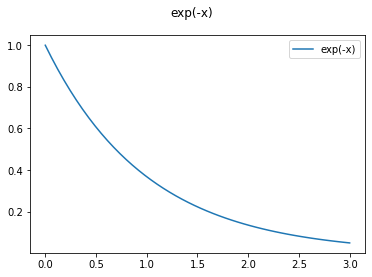

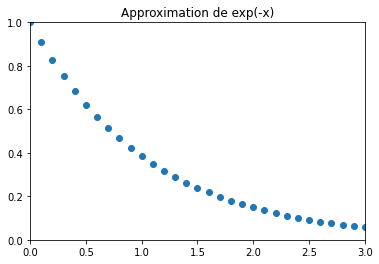

In [55]:
fig, ax = plt.subplots()
x = np.linspace(0, 3, 50)
y = np.exp(-x)
ax.plot(x, y, label ='exp(-x)')
plt.legend()  
plt.suptitle('exp(-x)')
plt.show()

res = Solver_one_equation(-u, 1)

absi = []
for i in range(0, len(res)):
    absi.append(res[i][0])
coords = []
for j in range(0, len(res)):
    coords.append(res[j][1])
    
plt.ylim([0, 1])
plt.title('Approximation de exp(-x)')
plt.xlim([0, 3])
plt.scatter(absi, coords)

### exp(x)

## Tests with 2 equations


In [69]:
LA.norm([-0.09, -0.01])

0.09055385138137416

0.1
[0.88 1.92]
[0.76 1.84]
[0.64 1.76]
[0.52 1.68]
[0.4 1.6]
[0.28 1.52]
[0.16 1.44]
[0.04 1.36]
[-0.08  1.28]
[-0.2  1.2]
0.2
[-0.32  1.12]
[-0.44  1.04]
[-0.56  0.96]
[-0.68  0.88]
[-0.8  0.8]
[-0.92  0.72]
[-1.04  0.64]
[-1.16  0.56]
[-1.28  0.48]
[-1.4  0.4]
0.30000000000000004
[-1.52  0.32]
[-1.64  0.24]
[-1.76  0.16]
[-1.88  0.08]
[-2.0000000e+00 -6.9388939e-16]
[-2.12 -0.08]
[-2.24 -0.16]
[-2.36 -0.24]
[-2.48 -0.32]
[-2.6 -0.4]
0.4
[-2.84 -0.56]
[-3.08 -0.72]
[-3.32 -0.88]
[-3.56 -1.04]
[-3.8 -1.2]
[-4.04 -1.36]
[-4.28 -1.52]
[-4.52 -1.68]
[-4.76 -1.84]
[-5. -2.]
0.5
[-5.35 -2.15]
[-5.7 -2.3]
[-6.05 -2.45]
[-6.4 -2.6]
[-6.75 -2.75]
[-7.1 -2.9]
[-7.45 -3.05]
[-7.8 -3.2]
[-8.15 -3.35]
[-8.5 -3.5]
0.6
[-9.09 -3.81]
[-9.68 -4.12]
[-10.27  -4.43]
[-10.86  -4.74]
[-11.45  -5.05]
[-12.04  -5.36]
[-12.63  -5.67]
[-13.22  -5.98]
[-13.81  -6.29]
[-14.4  -6.6]
0.7
[-15.24  -7.16]
[-16.08  -7.72]
[-16.92  -8.28]
[-17.76  -8.84]
[-18.6  -9.4]
[-19.44  -9.96]
[-20.28 -10.52]
[-21.12 -11.08]


[-5724423.98 -3816278.82]
[-5944594.46 -3963059.14]
[-6164764.94 -4109839.46]
[-6384935.42 -4256619.78]
[-6605105.9 -4403400.1]
[-6825276.38 -4550180.42]
[-7045446.86 -4696960.74]
[-7265617.34 -4843741.06]
[-7485787.82 -4990521.38]
[-7705958.3 -5137301.7]
4.5
[-8014197.02 -5342794.18]
[-8322435.74 -5548286.66]
[-8630674.46 -5753779.14]
[-8938913.18 -5959271.62]
[-9247151.9        -6164764.10000001]
[-9555390.62       -6370256.58000001]
[-9863629.34       -6575749.06000001]
[-10171868.06        -6781241.54000001]
[-10480106.78        -6986734.02000001]
[-10788345.50000001  -7192226.50000001]
4.6
[-11219879.77000001  -7479915.93000001]
[-11651414.04        -7767605.36000001]
[-12082948.31        -8055294.79000001]
[-12514482.58        -8342984.22000001]
[-12946016.85        -8630673.65000001]
[-13377551.12        -8918363.08000001]
[-13809085.39        -9206052.51000001]
[-14240619.66        -9493741.94000001]
[-14672153.93  -9781431.37]
[-15103688.2 -10069120.8]
4.699999999999999
[-1570

[-8.59729383e+11 -5.73152922e+11]
[-8.88387029e+11 -5.92258020e+11]
[-9.17044675e+11 -6.11363117e+11]
[-9.45702322e+11 -6.30468214e+11]
[-9.74359968e+11 -6.49573312e+11]
[-1.00301761e+12 -6.68678409e+11]
7.999999999999988
[-1.04313832e+12 -6.95425546e+11]
[-1.08325902e+12 -7.22172682e+11]
[-1.12337973e+12 -7.48919818e+11]
[-1.16350043e+12 -7.75666955e+11]
[-1.20362114e+12 -8.02414091e+11]
[-1.24374184e+12 -8.29161227e+11]
[-1.28386255e+12 -8.55908364e+11]
[-1.32398325e+12 -8.82655500e+11]
[-1.36410395e+12 -9.09402637e+11]
[-1.40422466e+12 -9.36149773e+11]
8.099999999999987
[-1.46039365e+12 -9.73595764e+11]
[-1.51656263e+12 -1.01104175e+12]
[-1.57273162e+12 -1.04848775e+12]
[-1.62890060e+12 -1.08593374e+12]
[-1.68506959e+12 -1.12337973e+12]
[-1.74123858e+12 -1.16082572e+12]
[-1.79740756e+12 -1.19827171e+12]
[-1.85357655e+12 -1.23571770e+12]
[-1.90974554e+12 -1.27316369e+12]
[-1.96591452e+12 -1.31060968e+12]
8.199999999999987
[-2.04455110e+12 -1.36303407e+12]
[-2.12318768e+12 -1.41545846

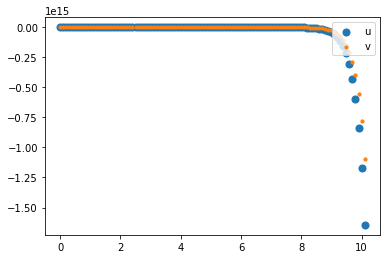

In [133]:
u0 = 1
v0 = 2
a = 2
b = 1
du = (-b/a)*u - (1/a)*v
dv = u - v

res = Solver_two_equations(u0, v0, fu, fv)
print(res[0])
print("-------")
print(res[1])

time = []
coords_u = []
coords_v = []

for i in range(0, len(res[0])):
    time.append(res[0][i][0])
    coords_u.append(res[0][i][1])
    coords_v.append(res[1][i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(time, coords_u, s=50, label='u')
ax1.scatter(time, coords_v, s=10, label='v')
plt.legend(loc='upper right');
plt.show()
